Notes for this setup

   * No feature scaling → XGBoost doesn’t need it.

   * No need to drop multicollinear features → trees handle it naturally.

   * Default hyperparameters already give strong performance.

Later you can:

   * Tune max_depth, learning_rate, n_estimators.

   * Use early_stopping_rounds with a validation set.

   *  Check feature importance with xgb.feature_importances_.


In [3]:
# Imports
import pandas as pd 
import numpy as np 
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from xgboost import XGBRegressor

# Load Datasets
train_df = pd.read_csv('../data/processed/feature_engineered_train.csv')
eval_df = pd.read_csv('../data/processed/feature_engineered_eval.csv')

# Define features & target 
target = "price"
X_train = train_df.drop(columns=[target])
y_train = train_df[target]

X_eval = eval_df.drop(columns=[target])
y_eval = eval_df[target]

print("Training data shape:", X_train.shape)
print("Evaluation data shape:", X_eval.shape)

# Train a simple XGBoost Regressor
xgb_model = XGBRegressor(random_state=42,
                        n_jobs=-1,
                        n_estimators=500,
                        learning_rate=0.05,
                        max_depth=6,
                        subsample=0.8,
                        colsample_bytree=0.8)
xgb_model.fit(X_train, y_train)


# Evaluate the model & Preformance Metrics
y_pred = xgb_model.predict(X_eval)

mae = mean_absolute_error(y_eval,y_pred)
mse = np.sqrt(mean_squared_error(y_eval,y_pred))
r2 = r2_score(y_eval,y_pred)

print("XGBoost Regressor Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.4f}")

Training data shape: (576815, 39)
Evaluation data shape: (148448, 39)
XGBoost Regressor Performance:
Mean Absolute Error: 32900.98
Root Mean Squared Error: 74151.63
R^2 Score: 0.9575


In [4]:
X_train.columns

Index(['year', 'quarter', 'month', 'median_list_price', 'median_ppsf',
       'median_list_ppsf', 'homes_sold', 'pending_sales', 'new_listings',
       'inventory', 'median_dom', 'avg_sale_to_list', 'sold_above_list',
       'off_market_in_two_weeks', 'bank', 'bus', 'hospital', 'mall', 'park',
       'restaurant', 'school', 'station', 'supermarket', 'Total Population',
       'Median Age', 'Per Capita Income', 'Total Families Below Poverty',
       'Total Housing Units', 'Median Rent', 'Median Home Value',
       'Total Labor Force', 'Unemployed Population',
       'Total School Age Population', 'Total School Enrollment',
       'Median Commute Time', 'lat', 'lng', 'zipcode_freq', 'city_encoded'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

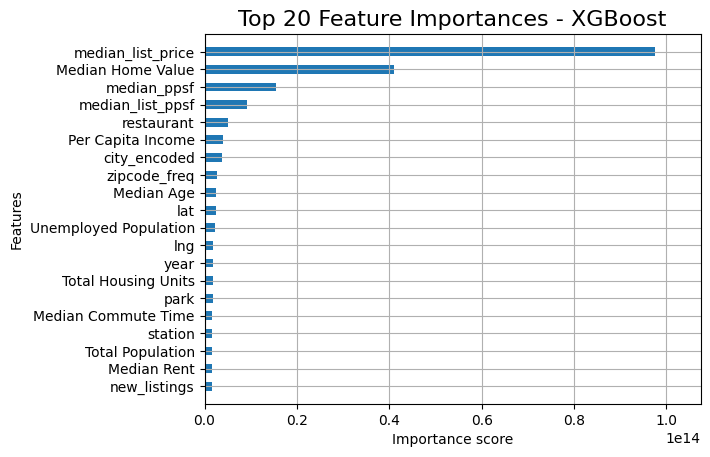

In [5]:
# Plot importance features
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(xgb_model, 
                max_num_features=20,
                importance_type='gain',
                height=0.5,
                show_values=False)
plt.title("Top 20 Feature Importances - XGBoost", fontsize=16)
plt.show()